# NeuroMet

Instructions:
* this notebook cannot be used for two different analysis at the same time. If you are unsure if someone is using it click on File / Make a copy and work with the copy.
* to run a cell press Umschalt (Shift) + Enter
* to correctly run the workflow _EVERY_ cell has to be ran
* When you run a cell, there is at first an [*] on the left, then a number (maybe an updated number) when the cell ran..6 
* normally the only thing to adjust in the settings is the subject_list

### External Modules

In [1]:
from pipeline.NeuroMet2_dev_fs7 import NeuroMet

210209-00:26:09,529 nipype.utils WARNING:
	 A newer version (1.5.1) of nipy/nipype is available. You are using 1.5.0


In [2]:
import os, glob 
from IPython.display import Image
%matplotlib inline

### Settings

In [3]:
project_prefix = ''
## Paths
raw_data_dir = '' # Directory with files with scanner structure
base_dir = '../ds000221'
temp_dir = '../tmp'

#cores
cores = 6
omp_nthreads = 3

Function**subject_list**:
* to analyze all subjects cut&paste below: `subject_list = [ x.split('/')[-1][8:11] for x in os.listdir(w_dir) if x.startswith('NeuroMet')]`
* to analyse only some subjects use the format: `subject_list = ['subject number', 'subject number' ... ]` i.e.: `subject_list = ['001']` or `subject_list = ['001', '003']` 

In [4]:
# Subject list as $ID$session. i.e. for sub-001/ses-01 '001T01'
subject_list = ['010002T01']

# SPM Segment and Mask generation

In [6]:
neuromet_creator = NeuroMet(subject_list,
                            raw_data_dir,
                            temp_dir,
                            base_dir,
                            omp_nthreads,
                           project_prefix)

w_dir=  ../ds000221


### Copy from raw data

In [7]:
#neuromet_creator.copy_from_raw_data() # ToDo

### Tissue Segmentation Pipeline

In [8]:
neuromet = neuromet_creator.make_neuromet1_workflow()

210209-00:27:08,989 nipype.workflow INFO:
	 Generated workflow graph: ./imgs/neuromet.png (graph2use=colored, simple_form=True).


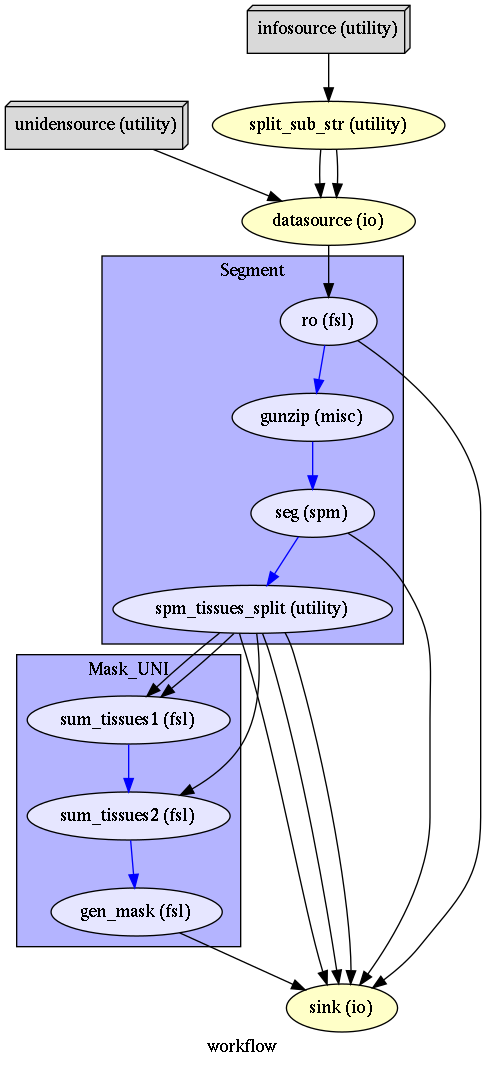

In [9]:
neuromet.write_graph(graph2use = 'colored', dotfilename = './imgs/neuromet')
Image(filename='./imgs/neuromet.png', width=400)

In [10]:
%%time
neuromet.run('MultiProc', plugin_args={'n_procs': cores})

210209-00:27:13,601 nipype.workflow INFO:
	 Workflow workflow settings: ['check', 'execution', 'logging', 'monitoring']
210209-00:27:13,672 nipype.workflow INFO:
	 Running in parallel.
210209-00:27:13,681 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 6.97/6.97, Free processors: 6/6.
210209-00:27:13,807 nipype.workflow INFO:
	 [Job 0] Cached (workflow.split_sub_str).
210209-00:27:15,680 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 6.97/6.97, Free processors: 6/6.
210209-00:27:15,901 nipype.workflow INFO:
	 [Node] Setting-up "workflow.datasource" in "/media/orco/home_data/Dokumente/Charitè/NeuroMET/tmp/workflow/_subject_id_010002T01/_uniden_DEN/datasource".
210209-00:27:15,901 nipype.workflow INFO:
	 [Node] Setting-up "workflow.datasource" in "/media/orco/home_data/Dokumente/Charitè/NeuroMET/tmp/workflow/_subject_id_010002T01/_uniden_UNI/datasource".
210209-00:27:15,912 nipype.workflow INFO:
	 [Node] R

RuntimeError: Workflow did not execute cleanly. Check log for details

# Combined image and Freesurfer analysis

In [ ]:
print(subject_list)

In [ ]:
# Uncomment here for all subjects:
#subject_list = [ x.split('/')[-1][8:11] for x in uni ]

# only some subjects? Then edit here:  
#subject_list = ['2004']

In [ ]:
import importlib
from pipeline import NeuroMet2_dev_fs7
importlib.reload(NeuroMet2_dev_fs7)
from pipeline.nodes import qdec
importlib.reload(qdec)

In [ ]:
neuromet_creator = NeuroMet2_dev_fs7.NeuroMet(subject_list,
                                              temp_dir,
                                              w_dir,
                                              omp_nthreads,
                                              raw_data_dir,
                                              overwrite)
neuromet_fs = neuromet_creator.make_neuromet_fs_workflow()

In [ ]:
neuromet_fs.write_graph(graph2use = 'colored', dotfilename = './imgs/neuromet_fs')
Image(filename='./imgs/neuromet_fs.png')

### Run Freesurfer Analysis

In [ ]:
%%time
neuromet_fs.run('MultiProc', plugin_args={'n_procs': cores})

In [ ]:
# Calculate and Ajust Volumes

In [ ]:
from pipeline.nodes import adj_vol, qdec

In [ ]:
import importlib
importlib.reload(qdec)

In [ ]:
q = qdec.QDec()

In [ ]:
q.inputs.basedir = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7'

In [ ]:
q.run().outputs.stats_directory

In [ ]:
import importlib
importlib.reload(adj_vol)

In [ ]:
v = adj_vol.AdjustVolume()

In [ ]:
v.inputs.stats_directory = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/stats_tables'
v.inputs.diag_csv = 